[Z-test (long)](#Z-test-(long))

[Z-test (short)](#Z-test-(short))

[Comparison of samples](#Comparison-of-samples)

[A/B testing (long example)](#A/B-testing-(long-example))

[A/B testing (short example)](#A/B-testing-(short-example))

[Bayesian A/B testing](#Bayesian-A/B-testing)

[IC & significance](#IC-&-significance)

In [201]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

# Z-test (long)

<font color='blue'>

We want to find the **mean** of an unknown distribution from which we have a sample.
    
$
\left\{
    \begin{array}{ll}
        \mathcal{H}_0: m=a \\
        \mathcal{H}_1: m>a \\
    \end{array}
\right.
$

Requirements/assumptions:
    
- we need the population to be normally distributed. Note: this may not be needed when sample size is high (> 30) as CLT will anyway give normality
    
- we need to know the standard deviation of the **population**
    
</font>

*Example* (based on Saporta p.325)

Context: farmers suffer from the weather. A company proposes a new method to increase the chance of raining. We want to assess the efficiency of the method.

In [202]:
years = np.array([1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])
mm = np.array([510, 614, 780, 512, 501, 535, 603, 788, 650]) # millimeters of rain
df_report = pd.DataFrame(data=np.stack([years, mm], axis=1), columns=['years','mm'])
df_report

,years,mm
0,1951,510
1,1952,614
2,1953,780
3,1954,512
4,1955,501
5,1956,535
6,1957,603
7,1958,788
8,1959,650


We'll say that the method really improves the raining frequency if on average it increases by at least 50 mm. Hence, the test is:

$\mathcal{H}_0: m=600~mm$ => if we keep $\mathcal{H}_0$, it means the method didn't improve the raining level (since the current mean is already 600).

Assumption: the natural raining level follows a Gaussian law $X \sim \mathcal{N}(600,100)$

We thus perform a zscore test.

1) Find the test: see above

2) Find the estimator: we use the empiric mean: $\hat \beta = \frac{1}{n}\sum_{i=1}^{n}X_i$

3) Write the rejection region: $Z = \{\hat \beta \ge k\}$

In order to accept $\mathcal{H}_0$ we need $\mathbb{P}_{\mathcal{H}_0}(\hat \beta \geq k) = \alpha$ or $\mathbb{P}_{\mathcal{H}_0}(\hat \beta < k) = 1-\alpha$

4) Compute the test statistic

$T = \frac{\hat \beta - \mu_\beta}{\sigma_\beta} \sim \mathcal{N}(0,1)$

Note: we don't need $\sqrt{n}$ since the distribution of $X$ is already Gaussian.

5) Retrieve quantiles of known distributions

We know that $\sigma_\beta = 100$ and that, under $\mathcal{H}_0$, $\mu_\beta = 600$.

Hence $\mathbb{P}_{\mathcal{H}_0}(\hat \beta < k) = \mathbb{P}_{\mathcal{H}_0}(T < \frac{k-600}{100/3})$

We thus deduce the value of $k$: $\frac{k-600}{100/3}=q_{1-\alpha}$

=> $k = q_{1-\alpha} \frac{100}{3}+600$

Thanks to the quantile table: $k = 1.64 \frac{100}{3}+600 = 655$

Finally the reject region is $Z = \{\hat \beta \ge 655\}$

We now find the numerical value of $\hat \beta$:

In [203]:
np.mean(df_report['mm'])

610.3333333333334

Since $610<655$ we don't reject $\mathcal{H}_0$ and conclude that the method doesn't significatively improves the raining level.

<font color='red'>In this example we looked for the distribution from which the sample is extracted. Here we only knew the type of the distribution (Gaussian) and its standard deviation. The power of the test is that it takes into account the fact that we only have a **sample** from an unknown distribution. It thus considers the randomization process into the final decision.</font>

# Z-test (short)

**Pre-step: simulate the population**

In [204]:
# we simulated sizes (cm)
low = 140
high = 190
pop = np.random.uniform(low=low, high=high, size=1000)
df_pop = pd.DataFrame(data=pop)
mu = df_pop.mean().values[0]
sigma = df_pop.std().values[0]
print('Stats POPULATION: mu={} sigma={}'.format(mu, sigma))

Stats POPULATION: mu=165.1832700867878 sigma=14.38911935996141


**Testing our sample**

$
\left\{
    \begin{array}{ll}
        \mathcal{H}_0: m = 165 \\
        \mathcal{H}_1: m \neq 165 \\
    \end{array}
\right.
$

In [205]:
theta = 155 # mean in our sample - is it significantly different from the true mean?
n_samples = 30
k1 = (-1.96)*sigma/np.sqrt(n_samples)+mu
k2 = 1.96*sigma/np.sqrt(n_samples)+mu
print('k1={}, k2={}'.format(k1, k2))
theta<k1 or theta>k2

k1=160.03418985281215, k2=170.33235032076342


True

Based on the rejection regions, we can safely reject $\mathcal{H}_0$: our sample mean is not representative of the population mean.

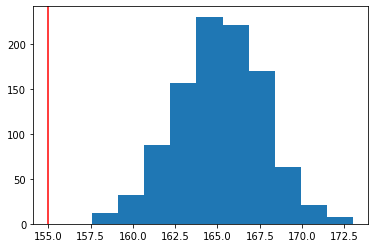

In [206]:
plt.hist(np.random.normal(mu, sigma/np.sqrt(n_samples), size=1000))
plt.axvline(theta, color='r')
plt.show()

When plotting the distribution, what we observed is very unlikely to happen if we would have repeated the experiment many times. This confirmed that we could safely reject our null hypothesis.

# Comparison of samples

Context: there are two universities. We want to know if students have the same size on average across the two universities.

Method: we don't have the sizes of all students so we only work with two samples. We will infer some conclusions for the total population.

*Total population*

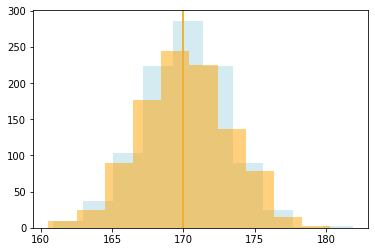

In [207]:
n = 1000

mu_1 = 170
sigma_1 = 3

mu_2 = 170
sigma_2 = 3

np.random.seed(1)

df_university = pd.DataFrame()

df_university['university_1'] = np.random.normal(mu_1, sigma_1, n)
df_university['university_2'] = np.random.normal(mu_2, sigma_2, n)

plt.hist(df_university['university_1'], alpha=0.5, color='lightblue')
plt.hist(df_university['university_2'], alpha=0.5, color='orange')
plt.axvline(mu_1, color='lightblue')
plt.axvline(mu_2, color='orange')
plt.show()

*Samples*

2.026256482661462
172.33561352746543
2.163264901132512
170.01095215894242


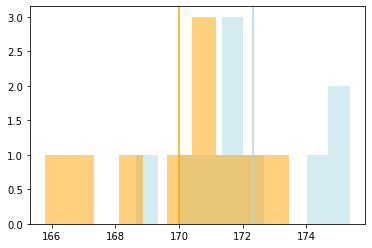

In [208]:
sample_1 = df_university['university_1'].sample(n=10)
print(np.std(sample_1))
print(np.mean(sample_1))
sample_2 = df_university['university_2'].sample(n=10)
print(np.std(sample_2))
print(np.mean(sample_2))

plt.hist(sample_1, alpha=0.5, color='lightblue')
plt.hist(sample_2, alpha=0.5, color='orange')
plt.axvline(np.mean(sample_1), color='lightblue')
plt.axvline(np.mean(sample_2), color='orange')
plt.show()

We note that depending on the sampling, the mean and standard deviation from the two samples are different, although the ones from the total population are similar.

*T-test*

t-test assumes **population** variances are equal

$\mathcal{H}_0: m_1=m_2$

In [209]:
ttest_ind(sample_1, sample_2)

Ttest_indResult(statistic=2.352878129103482, pvalue=0.03020273708208031)

pvalue < 5% => we reject $\mathcal{H}_0$ without taking too much risk => the two samples have significantly different means; since the test takes into account the randomization of the sampling, we deduce **the two universities have significantly different means**.

pvalue > 5% => we don't reject $\mathcal{H}_0$ without taking too much risk => the two samples don't have significantly different means; since the test takes into account the randomization of the sampling, we deduce **the two universities have the same means**.

# A/B testing (long example)

**Tutorial**: https://towardsdatascience.com/the-math-behind-a-b-testing-with-example-code-part-1-of-2-7be752e1d06f

**Context**: we want to test the subscription of a new recommended product.

**A/B testing**: before making the subscription, we test the performance of a small number of users. The used test is Z-test (with known variance).

$\mathcal{H}_0: \mu_1=\mu_2$

**Framework**: 

- The satisfaction rate is the number of clients achieving a high performance (satisfied clients).
- The control group is the group of clients who did not invest in new product
- The test group is the group of clients who invested in the new product

In [210]:
import scipy.stats as scs
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

*Data generation*

In [211]:
N = 2000
N_A = 1000 # desired samples for group A
N_B = 1000 # desired samples for group B
p_group = N_A/(N_A + N_B) # = 0.5

In [212]:
control_cr = 0.2 # true conversion rate for group A
test_cr = 0.24 # true conversion rate for group B

$$G \sim \mathcal{B}(0.5)$$
$$X_{|G=A} \sim \mathcal{B}(control\_cr)$$
$$X_{|G=B} \sim \mathcal{B}(test\_cr)$$

In [213]:
df_data = pd.DataFrame(data={'Group':['A' if (scs.bernoulli(p_group).rvs()==1) else 'B' for i in range(N)]})
df_data['Satisfied'] = df_data.apply(lambda x : scs.bernoulli(control_cr).rvs() if x['Group']=='A' \
                                                else scs.bernoulli(test_cr).rvs(), axis=1)

In [214]:
df_data.head()

,Group,Satisfied
0,A,1
1,A,0
2,B,0
3,B,0
4,B,0


In [215]:
ab_summary = df_data.pivot_table(values='Satisfied', index='Group', aggfunc=np.sum)
ab_summary['total'] = df_data.pivot_table(values='Satisfied', index='Group', aggfunc=lambda x: len(x))
ab_summary['rate'] = df_data.pivot_table(values='Satisfied', index='Group')
ab_summary

,Satisfied,total,rate
Group,,,
A,196,1024,0.191406
B,206,976,0.211066


We now want to measure if the difference of performance is statistically significant or not.

*Plot distributions*

In [216]:
N_A_satisfied = ab_summary[ab_summary.index=='A']['Satisfied'].values[0]
N_B_satisfied = ab_summary[ab_summary.index=='B']['Satisfied'].values[0]

N_A_total = ab_summary[ab_summary.index=='A']['total'].values[0]
N_B_total = ab_summary[ab_summary.index=='B']['total'].values[0]

In [217]:
# Estimators
p_A = N_A_satisfied/N_A_total
p_B = N_B_satisfied/N_B_total

*Simulation (for illustration only)*

If we want to display the distribution of the successes, we can repeat the data generation many times to artificially create samples. This is equivalent to generating a binomial distribution (repetition of Bernoulli variables).

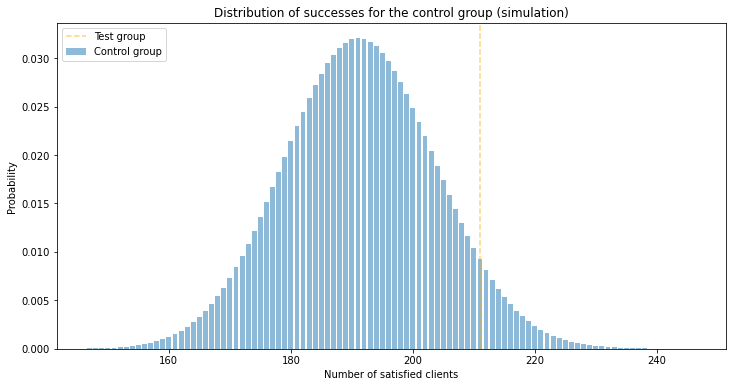

In [218]:
fig, ax = plt.subplots(figsize=(12,6))

# Control group: distribution of successes
x = np.linspace(N_A_satisfied-49, N_A_satisfied+50, 100)
y = scs.binom(N_A, p_A).pmf(x) # we generate many Bernoulli variables
ax.bar(x, y, alpha=0.5, label='Control group')

# Test group: success threshold
ax.axvline(x=p_B*N_A, c='orange', alpha=0.5, linestyle='--', label='Test group')

plt.xlabel('Number of satisfied clients')
plt.ylabel('Probability')
plt.legend(loc="upper left")
plt.title('Distribution of successes for the control group (simulation)')
plt.show()

We can also add the distribution of successes for the test group by generating multiple Bernoulli variables.

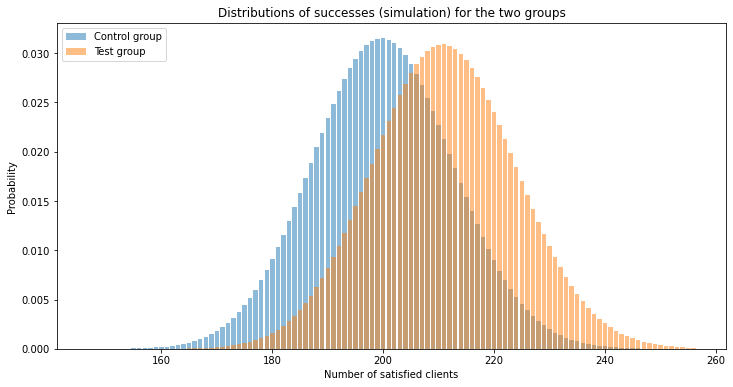

In [219]:
# Control group: distribution of successes
fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(N_A_satisfied-49, N_A_satisfied+50, 100)
yA = scs.binom(N_A, control_cr).pmf(xA) # we generate many Bernoulli variables
ax.bar(xA, yA, alpha=0.5, label='Control group')

# Test group: distribution of successes
xB = np.linspace(N_B_satisfied-49, N_B_satisfied+50, 100)
yB = scs.binom(N_B, p_B).pmf(xB) # we generate many Bernoulli variables
ax.bar(xB, yB, alpha=0.5, label='Test group')

plt.xlabel('Number of satisfied clients')
plt.ylabel('Probability')
plt.legend(loc="upper left")
plt.title('Distributions of successes (simulation) for the two groups')
plt.show()

It looks like the probability to get a high number of satisfied clients after recommending the product is higher for the test group. It's a good sign because it may means that the recommendation really makes a difference. However, we cannot conclude anything at this stage; we need to continue the analysis and perform tests that take the number of samples into account.

$Normality$

Estimated mean: average of many sample means.

$$\hat p = \frac{1}{n}\sum_i^nX_i$$

CLT: the standardized estimated mean follows a centered-reduced distribution.

In other words, the estimated mean is normally distributed around the true mean $\mu$ (the mean coming from the population).

$$\frac{\hat p - \mu_{\hat p}}{\sigma_{\hat p}} \sim \mathcal{N}(0,1)$$

Since $X_i, i=1,...,n$ is a Bernoulli variable, we can write for each group:

$$\hat p \sim \mathcal{N}(p, \sqrt{\frac{p(1-p)}{n}})$$

Note: $\sqrt{\frac{p(1-p)}{n}}$ is the **standard error**. The standard deviation reflects variability within <ins>one</ins> sample of a population, while the standard error estimates the variability across <ins>many</ins> samples of a population.

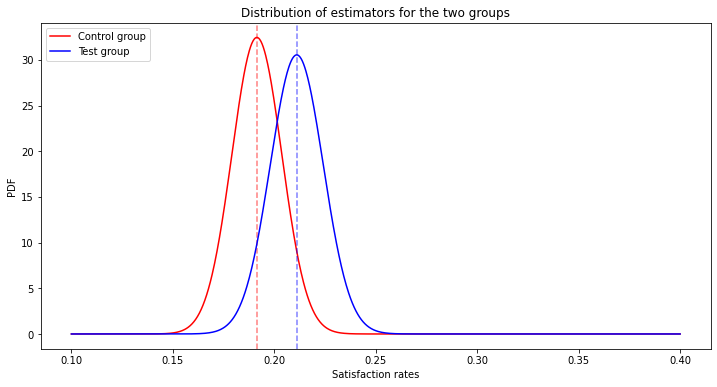

In [220]:
# standard error of the mean for both groups
SE_A = np.sqrt((p_A * (1-p_A)) / N_A_total)
SE_B = np.sqrt((p_B * (1-p_B)) / N_B_total)

fig, ax = plt.subplots(figsize=(12,6))
xA = np.linspace(.1, .4, 1000)
yA = scs.norm(p_A, SE_A).pdf(xA)
ax.plot(xA, yA, c='red', label='Control group')
ax.axvline(x=p_A, c='red', alpha=0.5, linestyle='--')

xB = np.linspace(.1, .4, 1000)
yB = scs.norm(p_B, SE_B).pdf(xB)
ax.plot(xB, yB, c='blue', label='Test group')
ax.axvline(x=p_B, c='blue', alpha=0.5, linestyle='--')

plt.xlabel('Satisfaction rates')
plt.ylabel('PDF')
plt.legend(loc="upper left")
plt.title('Distribution of estimators for the two groups')
plt.show()

<font color=red>Warning: in the above graph, estimator = $\hat \mu$</font>

The dash lines are the estimators for both groups $\hat p_A$ and $\hat p_B$.

We now want to focus on the difference, i.e. estimator $\hat d = \hat p_A - \hat p_B$

$$\mathbb{E}[\hat p_A - \hat p_B] = p_A - p_B$$

$$\mathbb{V}[\hat p_A - \hat p_B] = \mathbb{V}[\hat p_A] + \mathbb{V}[\hat p_B] = \frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}$$

Thus,

$$\hat d \sim \mathcal{N}(p_A - p_B, \sqrt{\frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}})$$

Pooled standard deviation??

We can then display the distributions of $\hat d$ under both hypothesis.

"After running our experiment, we get a resulting conversion rate for both groups. If we calculate the **difference** between the conversion rates, we end up with one result, the difference or the effect of the design change. Our task is to determine **which population this result came from, the null hypothesis or the alternative hypothesis**."

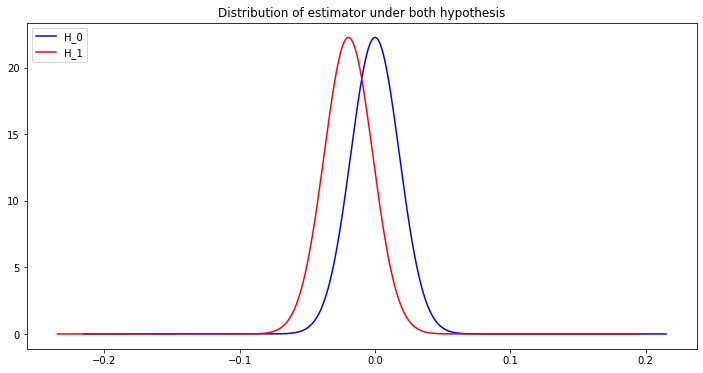

In [221]:
# Estimator under H0
mu_0 = 0
sigma_0 = np.sqrt((p_A*(1-p_A)/N_A)+(p_B*(1-p_B)/N_B))
x_0 = np.linspace(mu_0 - 12 * sigma_0, mu_0 + 12 * sigma_0, 1000)
y_0 = scs.norm(mu_0, sigma_0).pdf(x_0)

# Estimator under H1
mu_1 = p_A-p_B
sigma_1 = np.sqrt((p_A*(1-p_A)/N_A)+(p_B*(1-p_B)/N_B))
x_1 = np.linspace(mu_1 - 12 * sigma_1, mu_1 + 12 * sigma_1, 1000)
y_1 = scs.norm(mu_1, sigma_1).pdf(x_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_0, y_0, c='blue', label='H_0')
ax.plot(x_1, y_1, c='red', label='H_1')
plt.legend(loc="upper left")
plt.title('Distribution of estimator under both hypothesis')
plt.show()

<font color=red>Warning: in the above graph, estimator = $\hat d$</font>

We now plot the confidence interval. We don't reject $\mathcal{H}_0$ when we are in the confidence interval.

In [222]:
# The quantile can be found with scs.norm().ppf(1-0.05/2)
left, right = mu_0-1.96*sigma_0, mu_0+1.96*sigma_0

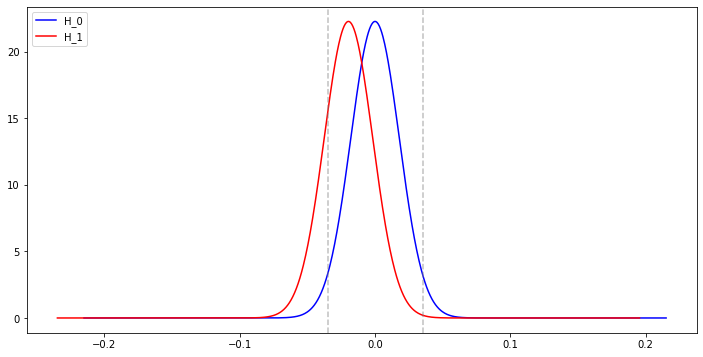

In [223]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_0, y_0, c='blue', label='H_0')
ax.plot(x_1, y_1, c='red', label='H_1')
ax.axvline(left, c='grey', linestyle='--', alpha=0.5)
ax.axvline(right, c='grey', linestyle='--', alpha=0.5)
plt.legend(loc="upper left")
plt.show()

We now add the power of the test which is a measurement of the *true positives*.

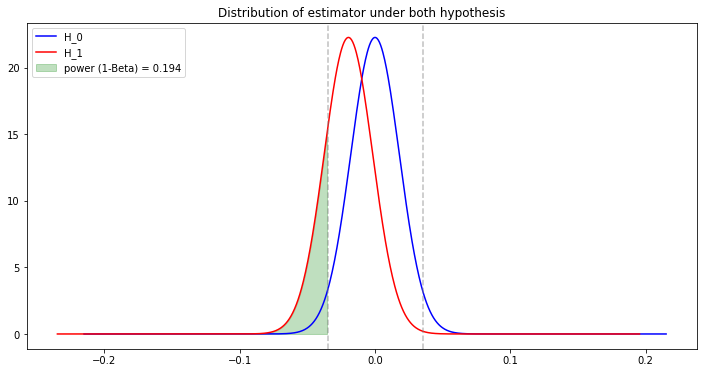

In [224]:
x = np.linspace(-12 * sigma_1, 12 * sigma_1, 1000)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_0, y_0, c='blue', label='H_0')
ax.plot(x_1, y_1, c='red', label='H_1')
ax.axvline(left, c='grey', linestyle='--', alpha=0.5)
ax.axvline(right, c='grey', linestyle='--', alpha=0.5)
ax.fill_between(x, 0, scs.norm(mu_1, sigma_1).pdf(x), color='green', alpha=0.25,
                where=(x < left), label='power (1-Beta) = {0:.3f}'.format(scs.norm(mu_1, sigma_1).cdf(left)))
plt.legend(loc="upper left")
plt.title('Distribution of estimator under both hypothesis')
plt.show()

We now add the significance level of the test ($\alpha$) which is the probability to reject a true null hypothesis.

$$\mathbb{P}_{\theta \in \Theta_0}(\widehat{\theta} \ge k)=\alpha$$

Where $Z=\{\widehat{\theta} \ge k\}$ is the rejection region.

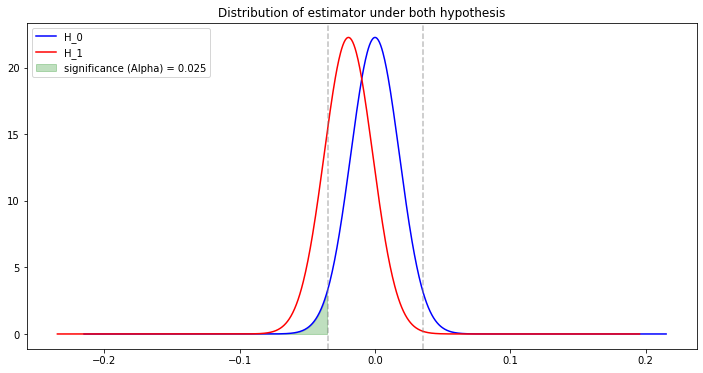

In [225]:
x = np.linspace(-12 * sigma_1, 12 * sigma_1, 1000)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(x_0, y_0, c='blue', label='H_0')
ax.plot(x_1, y_1, c='red', label='H_1')
ax.axvline(left, c='grey', linestyle='--', alpha=0.5)
ax.axvline(right, c='grey', linestyle='--', alpha=0.5)
ax.fill_between(x, 0, scs.norm(mu_0, sigma_1).pdf(x), color='green', alpha=0.25,
                where=(x < left), label='significance (Alpha) = {0:.3f}'.format(scs.norm(mu_0, sigma_1).cdf(left)))
plt.legend(loc="upper left")
plt.title('Distribution of estimator under both hypothesis')
plt.show()

In [226]:
print('Confidence interval: [{},{}]'.format(round(left,3), round(right,3)))

Confidence interval: [-0.035,0.035]


$p_A - p_B = -0.0268$ which is included in the confidence interval so don't reject the null hypothesis and deduce there is not significant effect.

To be continued (same tutorial): how to find optimal minimum sample size to achieve a certain test power?

# A/B testing (short example)

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs

In [228]:
N_A = 10000
N_B = 10000
# true means
p_A = 0.4
p_B = 0.42

In [229]:
group_a = np.random.binomial(1,p_A,N_A)
group_b = np.random.binomial(1,p_B,N_B)

In [230]:
# Estimators
p_A_hat = np.sum(group_a)/N_A
p_B_hat = np.sum(group_b)/N_B
print(p_A_hat)
print(p_B_hat)

0.4036
0.4197


In [231]:
# for illustration purposes
df_data = pd.DataFrame(data={'Group':['A' if i<N_A else 'B' for i in range(N_A+N_B)],
                             'Perf>6%':list(group_a)+list(group_b)})
df_data.index.name = 'Client'
df_data.sample(n=10)

,Group,Perf>6%
Client,,
12321,B,0
4005,A,1
2929,A,1
16038,B,1
9245,A,1
10169,B,1
17105,B,1
16964,B,1
4773,A,0


Thanks to CLT, $\frac{\hat p_A - \mu_{\hat p_A}}{\sigma_{\hat p_A}} \sim \mathcal{N}(0,1)$ and $\frac{\hat p_B - \mu_{\hat p_B}}{\sigma_{\hat p_B}} \sim \mathcal{N}(0,1)$

Thus,

$\hat p_A - \hat p_B \sim \mathcal{N}(\mathbb{E}[\hat{p_A}-\hat{p_B}],\sqrt{\mathbb{V}[\hat{p_A}-\hat{p_B}]})$

And,

$\mathbb{E}[\hat{p_A}-\hat{p_B}]=p_A - p_B$

$\mathbb{V}[\hat{p_A}-\hat{p_B}]=\frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}$

Confidence interval: [-0.014,0.014]


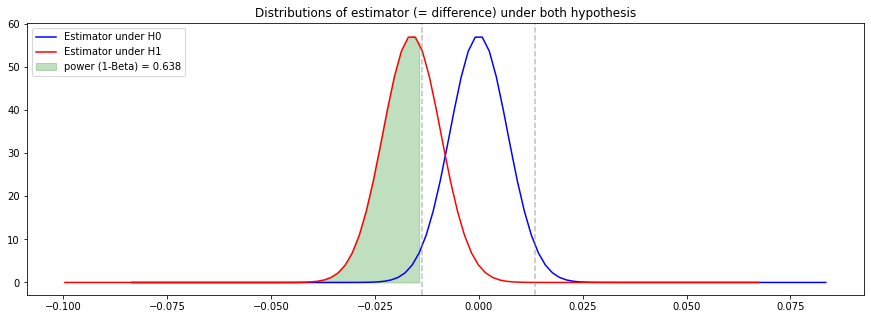

In [232]:
# parameters
mu_0 = 0
mu_1 = p_A_hat-p_B_hat
sigma = np.sqrt(p_A_hat*(1-p_A_hat)/N_A + p_B_hat*(1-p_B_hat)/N_B)

# confidence intervals -- Significance level=5%
CI_left = mu_0-1.96*sigma
CI_right = mu_0+1.96*sigma
print('Confidence interval: [{},{}]'.format(round(CI_left,3), round(CI_right,3)))

# plot densities
x0 = np.linspace(mu_0-12*sigma,mu_0+12*sigma,100)
x1 = np.linspace(mu_1-12*sigma,mu_1+12*sigma,100)
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax.plot(x0, scs.norm(mu_0,sigma).pdf(x0), c='blue', label='Estimator under H0')
ax.plot(x1, scs.norm(mu_1,sigma).pdf(x1), c='red', label='Estimator under H1')

# plot confidence interval
ax.axvline(CI_left, c='grey', linestyle='--', alpha=0.5)
ax.axvline(CI_right, c='grey', linestyle='--', alpha=0.5)

# plot power of the test
ax.fill_between(x0, 0, scs.norm(mu_1, sigma).pdf(x0), color='green', alpha=0.25,
                where=(x0 < CI_left), label='power (1-Beta) = {0:.3f}'.format(scs.norm(mu_1, sigma).cdf(CI_left)))

plt.legend(loc="upper left")
plt.title('Distributions of estimator (= difference) under both hypothesis')
plt.show()

plt.show()

In [233]:
print('Estimator group A: {}'.format(round(p_A_hat,3)))
print('Estimator group B: {}'.format(round(p_B_hat,3)))
diff = p_A_hat-p_B_hat # real value (based on sample)
print('Diff={}'.format(round(diff,3)))
if diff < CI_left or diff > CI_right:
    print('The difference is out of the confidence interval.'
          +'\nThus, we can reject H_0 stating there is no signficant effect.'
          +'\n=> "SIGNIFICANT EFFECT"')
else:
    print('The difference is not out of the confidence interval.'
          +'\nThus, we can NOT reject H_0 stating there is no signficant effect.'
          +'\n=> NO SIGNIFICANT EFFECT')

Estimator group A: 0.404
Estimator group B: 0.42
Diff=-0.016
The difference is out of the confidence interval.
Thus, we can reject H_0 stating there is no signficant effect.
=> "SIGNIFICANT EFFECT"


**Power of the test**: increasing the number of observations has the effect of reducing the standard deviation of both estimators (H_0 and H_1) and thus add more space between the two densities => increase the power of the test

# Bayesian A/B testing

In Bayesian testing, the probability is not determined in a unique manner. As the result, the final probability is actually a distribution.

<img src='ab-testing-bayesian.png' width='500px'></img>

The below is largely inspired by https://towardsdatascience.com/bayesian-a-b-testing-with-python-the-easy-guide-d638f89e0b8a.

**Beta distribution**: the beta distribution is a suitable model for the random behavior of percentages and proportions because the outcome is between 0 and 1. In Bayesian, it's the prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. 

"usually solutions to the Bayes theorem are hard (if not impossible) to be solved exactly, and that’s why few approximation methods have been developed, like Markov Chain Monte Carlo (MCMC)."



In [234]:
import numpy as np
import pandas as pd

from math import lgamma
from scipy.stats import beta

import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
n_ctrl, convs_ctrl = 16500, 30 
n_test, convs_test = 17000, 50

Prior:

$$\theta_A \sim Beta(1,1)$$

where $\theta_A$ is the probability of converting for group A

This is equivalent to the uniform distribution.

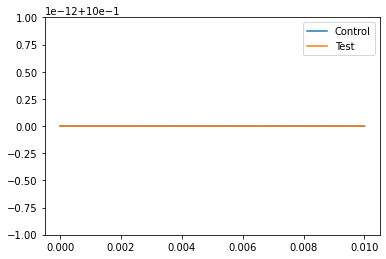

In [236]:
# Prior => uniform law (uninformative prior)
a_C, b_C = 1, 1
beta_prior_C = beta(a_C, b_C)

a_T, b_T = 1, 1
beta_prior_T = beta(a_T, b_T)

x = np.linspace(0,0.01,100)
plt.plot(x, beta_prior_C.pdf(x), label='Control')
plt.plot(x, beta_prior_T.pdf(x), label='Test')
plt.legend()
plt.show()

"It is often useful to think of the hyperparameters of a conjugate prior distribution as corresponding to having observed a certain number of pseudo-observations with properties specified by the parameters. For example, the values $\alpha$ and $\beta$ of a beta distribution can be thought of as corresponding to **$\alpha − 1$ successes and $\beta-1$ failures** if the posterior mode is used to choose an optimal parameter setting, or $\alpha$ successes and $\beta$ failures if the posterior mean is used to choose an optimal parameter setting. In general, for nearly all conjugate prior distributions, the hyperparameters can be interpreted in terms of pseudo-observations. This can help both in providing an intuition behind the often messy update equations, as well as to help choose reasonable hyperparameters for a prior." Wikipedia, conjugate priors.

After running the experiment, we have $n_A$ and we observe $p_A$. We can thus update the prior. Let $X_A$ the number of converted users.

Since $\theta_A \sim Beta(1,1)$ and $X_A | \theta_A \sim Beta(n_A, p_A)$ we have from Bayes' formula:

$$\theta_A | X_A \sim Beta(1 + n_A, 1 + n_A - x_A)$$

In [237]:
a_C += convs_ctrl # successes
b_C += n_ctrl-convs_ctrl # failures
beta_C = beta(a_C, b_C)

a_T += convs_test # successes
b_T += n_test-convs_test # failures
beta_T = beta(a_T, b_T)

In [238]:
lower_bound=0
upper_bound=0.005

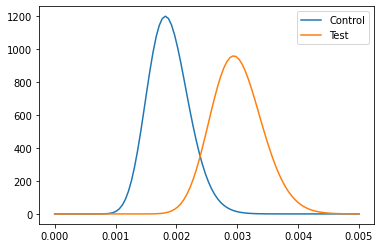

In [239]:
x = np.linspace(lower_bound,upper_bound,100)
plt.plot(x, beta_C.pdf(x), label='Control')
plt.plot(x, beta_T.pdf(x), label='Test')
plt.legend()
plt.show()

This plot shows that in Bayesianism **the parameter is a random variable**.

*Note*: the more data we have, the more the function becomes narrower after the update.

Uplift: variation rate between control and test group.

$$uplift = \frac{CR_{test}-CR_{control}}{CR_{control}}$$

In [240]:
uplift = (beta_T.mean()-beta_C.mean())/beta_C.mean()
print(uplift)

0.5967798854783688


Now, how to confident are we in this uplift measure?

*Probability of being better*

posterior = probability of being better = probability the test group is better = weighted probability of all possible distributions (**to be verified**)

"probability of being better" = $\mathbb{P}(p_B > p_A)$

Most articles suggest to use Monte Carlo simulations to find the probability of being better. It consists in simulating the variables (parameters = conversion rates) of both distributions and looking for the overlap (<a href='https://towardsdatascience.com/bayesian-ab-testing-part-i-conversions-ac2635f878ec'>example</a>). However, exact formulas are available on <a href='https://www.evanmiller.org/bayesian-ab-testing.html'>Evan Miller's website</a> or in <a href='https://www.johndcook.com/exact_beta_inequalities.pdf'>John Cook's article</a>.

*Monte Carlo method*

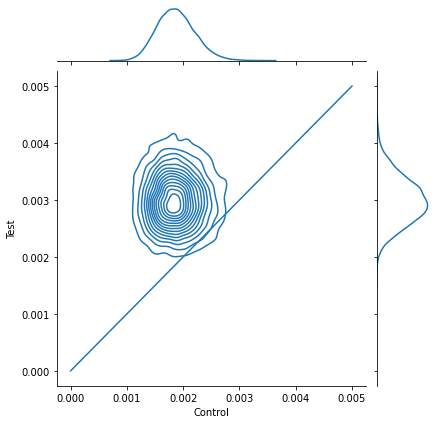

In [241]:
val_C=np.random.beta(a_C, b_C, 10000)
val_T=np.random.beta(a_T, b_T, 10000)
vals=np.vstack([val_C, val_T]).T

df=pd.DataFrame(vals, columns=['Control', 'Test'])
df=df[df['Control']<upper_bound]
df=df[df['Test']<upper_bound]
g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([lower_bound, upper_bound], [lower_bound, upper_bound])

*Exact formulation*

In [242]:
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)

def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

In [243]:
prob = calc_prob_between(beta_T, beta_C)

print(f"Test option lift Conversion Rates by {uplift*100:2.2f}% with {prob*100:2.1f}% probability.")

Test option lift Conversion Rates by 59.68% with 98.2% probability.


Questions:

- Are we sure the distribution looks like Beta?

- Rationale behind adding to parameters of the Beta distribution when we update? What do those parameters mean exactly? --> proof on https://towardsdatascience.com/bayesian-ab-testing-part-i-conversions-ac2635f878ec

- Proof behind the computation of proba to be better? --> see John Cook or Even Miller's articles (links above)

- Credibility interval?

- Enough samples?

- Duration? ("how long should the test be ran")

- Prior as uniform? other option: conversion rate on previous tests

- Proba to be better = area under curve? any use of joint distribution (maybe when variables are not independent)?

- Loss? (explained <a href='https://towardsdatascience.com/bayesian-ab-testing-part-i-conversions-ac2635f878ec'>here</a>)

*Check*

In [244]:
import numpy as np
import pandas as pd

from math import lgamma
from scipy.stats import beta

import matplotlib.pyplot as plt
import seaborn as sns

In [245]:
n_ctrl, convs_ctrl = 5, 2 
n_test, convs_test = 4, 3

# n_ctrl, convs_ctrl = 50, 20
# n_test, convs_test = 40, 30

# n_ctrl, convs_ctrl = 1390, 835 
# n_test, convs_test = 1480, 863

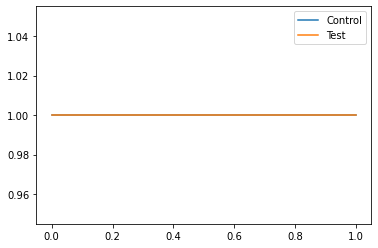

In [246]:
# Prior => uniform law (uninformative prior)
a_C, b_C = 1, 1
beta_prior_C = beta(a_C, b_C)

a_T, b_T = 1, 1
beta_prior_T = beta(a_T, b_T)

x = np.linspace(0,1,100)
plt.plot(x, beta_prior_C.pdf(x), label='Control')
plt.plot(x, beta_prior_T.pdf(x), label='Test')
plt.legend()
plt.show()

In [247]:
a_C += convs_ctrl # successes
b_C += n_ctrl-convs_ctrl # failures
beta_C = beta(a_C, b_C)

a_T += convs_test # successes
b_T += n_test-convs_test # failures
beta_T = beta(a_T, b_T)

In [248]:
lower_bound=0
upper_bound=1

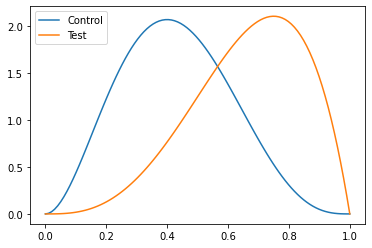

In [249]:
x = np.linspace(lower_bound,upper_bound,100)
plt.plot(x, beta_C.pdf(x), label='Control')
plt.plot(x, beta_T.pdf(x), label='Test')
plt.legend()
plt.show()

In [250]:
uplift = (beta_T.mean()-beta_C.mean())/beta_C.mean()
print(uplift)

0.5555555555555556


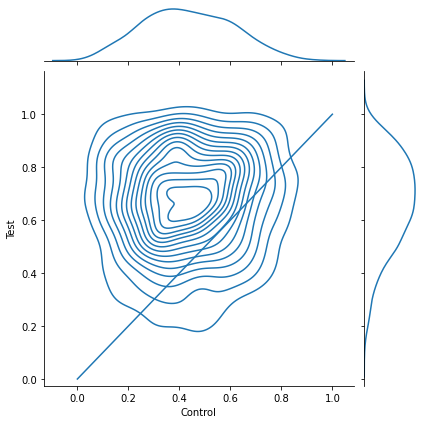

In [251]:
val_C=np.random.beta(a_C, b_C, 1000)
val_T=np.random.beta(a_T, b_T, 1000)
vals=np.vstack([val_C, val_T]).T

df=pd.DataFrame(vals, columns=['Control', 'Test'])
df=df[df['Control']<upper_bound]
df=df[df['Test']<upper_bound]

g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([lower_bound, upper_bound], [lower_bound, upper_bound])

*Exact formulation*

In [252]:
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)

def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))

def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d

def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))

def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

In [253]:
prob = calc_prob_between(beta_T, beta_C)

print(f"Test option lift Conversion Rates by {uplift*100:2.2f}% with {prob*100:2.1f}% probability.")

Test option lift Conversion Rates by 55.56% with 82.5% probability.


# IC & significance

The relationship between CI and significance is often explained with the following schema:

<img src='CI-significance.png' width='400px'></img>

In [254]:
mu_pop = 0
std_pop = 1
n_1, n_2 = 10, 10

In [255]:
p = 0 # H0

*Test 1*

In [256]:
data_1 = np.random.normal(mu_pop, std_pop, size=n_1)

In [257]:
theta_est_1 = np.mean(data_1)
theta_est_1

-0.4469658213829832

In [258]:
k1_1 = p - 1.96*std_pop/np.sqrt(n_1)
k2_1 = p + 1.96*std_pop/np.sqrt(n_1)

In [259]:
if theta_est_1<k1_1 or theta_est_1>k2_1:
    print('Significant effect. We reject H0 => the population mean is likely to be different from {}.'.format(p))
else:
    print('Not significant effect. We can\'t reject H0 => no evidence that the population mean is different from {}.'.format(p))

Not significant effect. We can't reject H0 => no evidence that the population mean is different from 0.


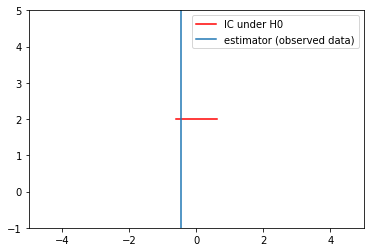

In [270]:
plt.plot([k1_1,k2_1], [2,2], 'r', label='IC under H0')
plt.axvline(x=theta_est_1, label='estimator (observed data)')

plt.xlim(-5, 5)
plt.ylim(-1, 5)

plt.legend()
plt.show()

The interval of all possible values under H0 includes the estimator (built on observed data) => it's likely that the hypothesis is true.

*Test 2*

In [261]:
data_2 = np.random.normal(mu_pop+2, std_pop, size=n_2)

In [262]:
theta_est_2 = np.mean(data_2)

In [263]:
theta_est_2

2.5404599927134557

In [264]:
k1_2 = p - 1.96*std_pop/np.sqrt(n_2)
k2_2 = p + 1.96*std_pop/np.sqrt(n_2)

In [265]:
if theta_est_2<k1_2 or theta_est_2>k2_2:
    print('Significant effect. We reject H0 => the population mean is likely to be different from {}.'.format(p))
else:
    print('Not significant effect. We can\'t reject H0 => no evidence that the population mean is different from {}.'.format(p))

Significant effect. We reject H0 => the population mean is likely to be different from 0.


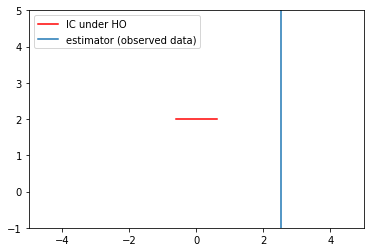

In [269]:
plt.plot([k1_2,k2_2], [2,2], 'r', label='IC under HO')
plt.axvline(x=theta_est_2, label='estimator (observed data)')

plt.xlim(-5, 5)
plt.ylim(-1, 5)

plt.legend()
plt.show()

The interval of all possible values under H0 does NOT include the estimator (built on observed data) => it's likely that the hypothesis is wrong.